# XOR 문제를 AI 로 해결해보고 시각화해보자

# 
## XOR 문제는 인공지능에서 굉장히 유명한 문제이다.
## XOR 문제는 입력값이 [1, 1] 이 들어가면 0, [1, 0] 이 들어가면 1, [0, 1] 이 들어가면 1, [0, 0] 이 들어가면 0 을 나타내는 문제이다.

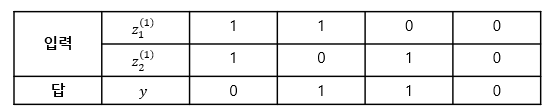

# 
## 2차원에 표현한 XOR 문제

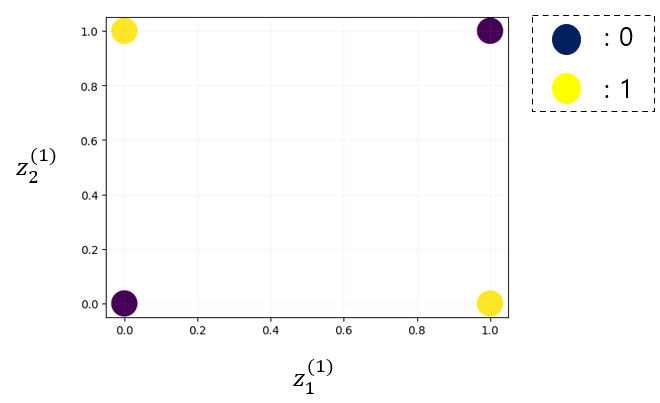

### 
## XOR 문제 소개 :
### XOR 문제는 데이터가 직선 하나로 나눠지지 않는 문제이다.

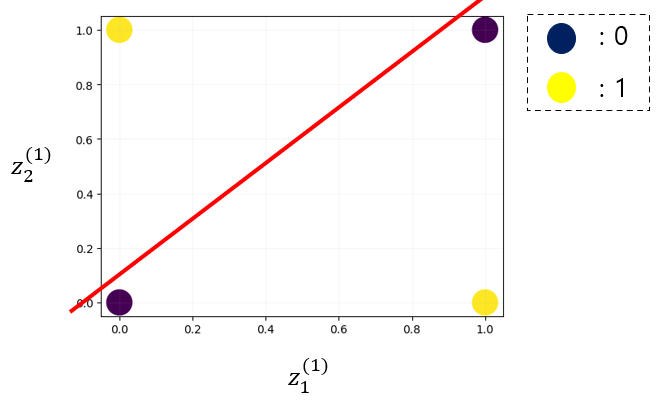

# 
### 데이터가 단 4개 밖에 존재하지않지만 인공지능에서 굉장히 유명해진 이유는 다음과 같다.
### 1969년 인공지능의 대가 마빈 민스키가 그 시대에 만들어진 인공지능 모델은 XOR 문제를 해결할 수 없음을 전세계에 알리면서 많은 사람들이 인공지능을 떠나며 인공지능에 아무도 관심을 가지지 않는 겨울이 찾아왔다.
### 하지만 1986년 럼멜하트가 오차역전파 방법을 인공지능에 적용하여 XOR 문제를 해결했고 이후 현재까지 엄청난 인공지능 열풍이 불게 만들었다.
### 인공지능의 희비 역사를 모두 갖고 있는 XOR 문제를 인공지능으로 직접 학습하여 풀어보도록 하자.

# 
## 학습 포인트 : 
## 1. 인공지능 신경망 모델이 XOR 문제를 어떻게 해결하는지 다양한 시각화를 통해 들여다본다.
## 2. 다양한 인공지능 신경망 모델을 설계하여 XOR 문제를 학습하면 어떻게 되는지 시각화를 통해 들여다본다.
### 더욱 자세히는 XOR 데이터를 2차원, 3차원으로 시각화하여 인공지능 신경망이 과연 어떻게 문제를 해결하는지 직접 그려보며 이해한다.

# 
# 파트 1 - 1. 인공지능 신경망이 XOR문제를 어떻게 해결하는지 2차원으로 시각화해보자.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import sys
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors
import matplotlib as mpl
from mpl_toolkits import mplot3d
from matplotlib import cm
from collections import OrderedDict
import matplotlib.animation as animation
import copy

In [2]:
X_data =  np.array([[1,1], [1,0], [0,1], [0,0]])
y_data = np.array([[0],[1],[1],[0]])

### 인공지능 서버 사용을 위한 GPU 할당량 조정 

In [3]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.001
session = tf1.Session(config=config)

2022-12-28 10:26:32.315903: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 10:26:32.918657: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 81 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:65:00.0, compute capability: 8.0


## XOR 문제를 풀기 위한 신경망 모델 구축

### 아래 그림과 같이 설계된 신경망은 입력층과 하나의 은닉층 그리고 출력층으로 구성되어 있다.
### 1. 입력층은 XOR 4개 데이터의 2개의 특징을 입력으로 받는 층 $z^{(1)}=[z^{(1)}_1 z^{(1)}_2] $을 의미함.
### 2. 첫 번째 은닉층은 첫 번째 선형변환층 $ y^{(1)}=[y^{(1)}_1 y^{(1)}_2] $과 첫 번째 비선형변환층 $ z^{(2)}=[z^{(2)}_1 z^{(2)}_2 ]$으로 구성되어 있고 은닉층의 각 노드는 2개씩 가지고 있음.
### 3. 출력층이자 신경망의 예측값인 $y^{out}$은 XOR 답의 형태와 갖게 1개의 노드로 출력되게 구성됨.
### 4. 신경망의 예측값 $y^{out}$ 은 정답 값 $y$ 와의 차이의 제곱을 나타내는 손실함수 $ (y^{out}-y)^2$ 을 최소화하도록 학습시킬 것임.

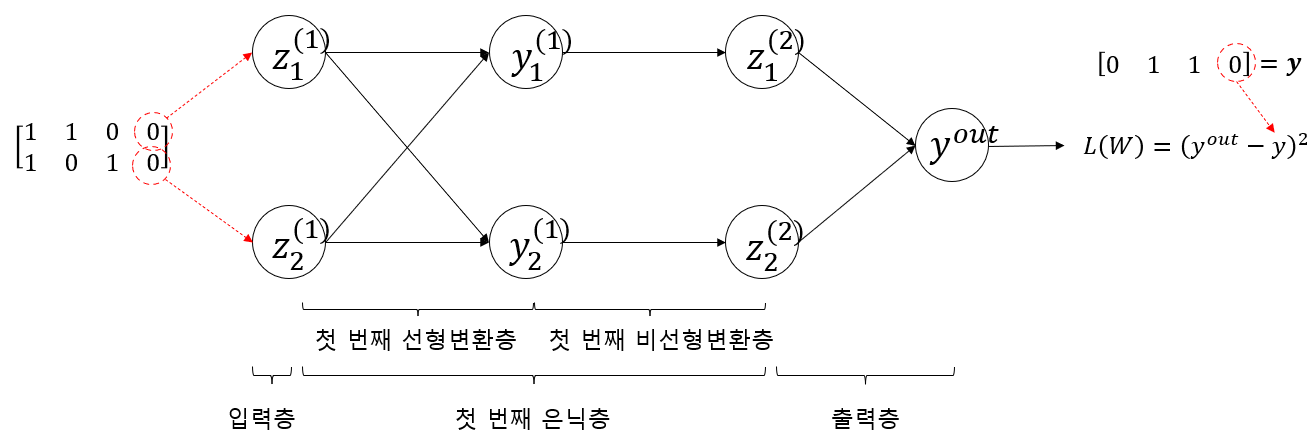
# 

### 조금 더 구체적으로
### 1. 첫 번째 선형변환층은 2개의 절편 $w^{(1)}_{01} , w^{(1)}_{02} $ 과 4개의 선형변환 가중치 $w^{(1)}_{11} , w^{(1)}_{12} , w^{(1)}_{21} , w^{(1)}_{22}$ 를 가지고 있고 행렬변환 연산을 함.
### 2. 첫 번째 비선형변환층은 시그모이드 함수 $1/(1+e^{-y})$ 을 사용하였고 원소곱 연산을 함.
### 3. 출력층은 절편 $w^{(2)}_{0}$ 과 선형변환 가중치 $w^{(2)}_{1} , w^{(2)}_{2}$ 을 가지고 있고 행렬변환 연산을 함.
### 4. 신경망은 손실함수 $L(W)=(y^{out}-y)^{2}$ 를 최소화하도록 신경망의 모든 절편과 선형변환 가중치를 나타내는 $W$에 대해 $L(W)$ 가 최소화되게 경사하강법을 사용하여 학습함.

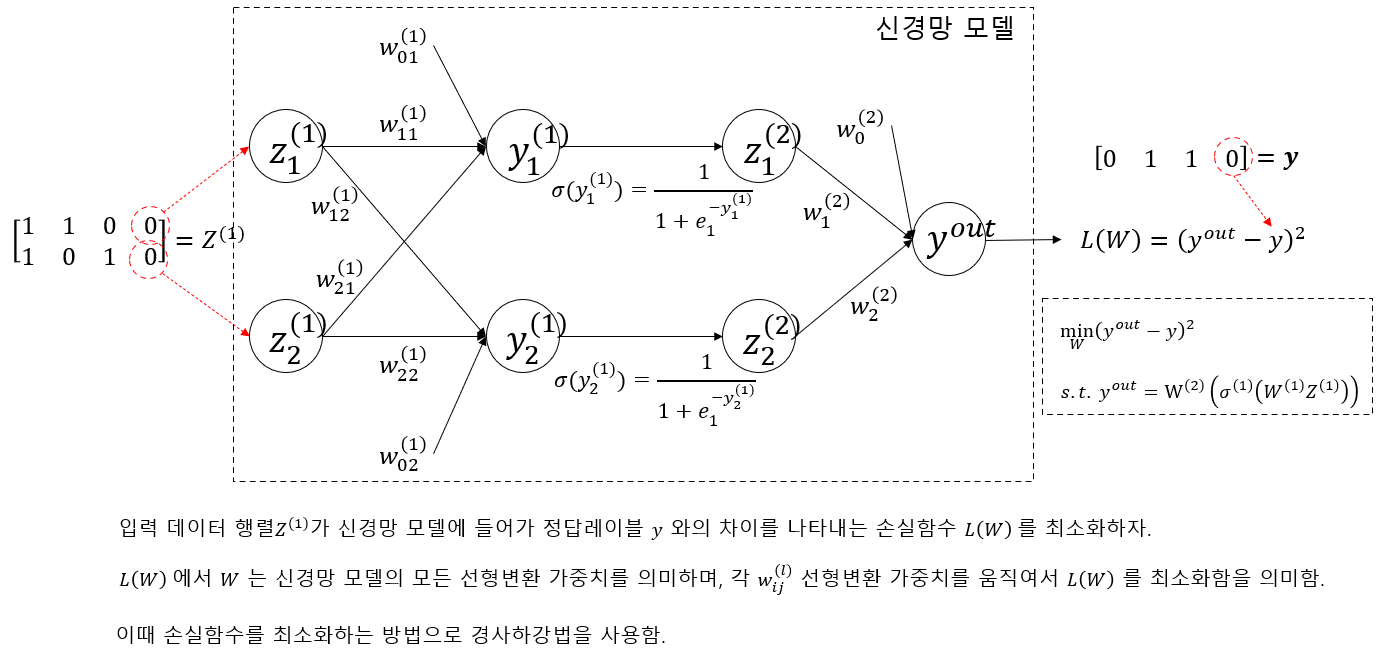

### tensorflow 을 사용한 모델 설계
#### tensorflow의 keras을 사용하여 고수준 API 를 구현할 수도 있지만 조금 더 세세한 컨트롤을 위해 상세히 코드를 다룰 수 있다.
#### 아래는 Sigmoid 함수와 은닉층이 1개인 간단한 network_model, 그리고 이를 keras.Model 로 학습할 수 있게 class 을 구현하였다.
#### network_model() 을 보면 return 값을 y(첫 번째 은닉층의 선형변환),z(첫 번째 은닉층의 비선형변환),out(출력값) 을 주었는데, 이는 나중에 은닉층, 출력층별 시각화를 그려보기 위한 것이다.

In [4]:
class Sigmoid(layers.Layer):
    def __init__(self, **kwargs):
        super(Sigmoid, self).__init__()

    def build(self, input_shape):
        self.activation = tf.nn.sigmoid
        super(Sigmoid, self).build(input_shape)

    def call(self, inputs, **kwargs):
        out = tf.cast(inputs, dtype=tf.float32)
        out = self.activation(out)
        return out

    def get_config(self):
        config = {'units': self.units}
        base_config = super(Sigmoid, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    #@tf_utils.shape_type_conversion
    def compute_output_shape(self, input_shape):
        return input_shape

class network_model(layers.Layer):
    def __init__(self, name="network_model", **kwargs):
        super(network_model, self).__init__()
        self.d1 = layers.Dense(2)
        self.a1 = Sigmoid()
        self.d2 = layers.Dense(1)

    def call(self, inputs, **kwargs):
        x = tf.cast(inputs, dtype=tf.float32)
        y = self.d1(x)
        z = self.a1(y)
        out = self.d2(z)
        
        return y,z,out
    
class XOR_model(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        name="XOR_model",
        **kwargs
    ):
        super(XOR_model, self).__init__(name=name, **kwargs)
        self.model = network_model()

    def call(self, inputs):
        y,z,out = self.model(inputs)
        return y,z,out

# 
## XOR 문제를 신경망으로 학습하기

#### model.fit() 함수를 사용하여 간단히 학습할 수 있는 방법도 있지만, 나중에 세세한 컨트롤을 위해 조금 더 하위 수준의 학습을 할 수 있는 GradientTape() 코드를 사용하였다.
#### tf.GradientTape() 코드는 모델의 forward 로 계산된 결과값에 대해 미분된 값을 자동으로 구현해주는 함수이다.

In [5]:
optimizer = keras.optimizers.Adam()
mse = tf.keras.losses.MeanSquaredError()
model = XOR_model()
epochs = 10001
pred_list = []

for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        y,z,out = model(X_data)
        loss = mse(y_data, out)
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

    if epoch % 1000 == 0:
        print("{} th loss : {}".format(epoch, np.array(loss)))

2022-12-27 04:34:59.632242: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 81 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:65:00.0, compute capability: 8.0
2022-12-27 04:35:00.304003: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


0 th loss : 1.3872220516204834
1000 th loss : 0.248545840382576
2000 th loss : 0.2292555868625641
3000 th loss : 0.19203172624111176
4000 th loss : 0.14255113899707794
5000 th loss : 0.06490083038806915
6000 th loss : 0.0057189203798770905
7000 th loss : 2.8681122785201296e-05
8000 th loss : 8.295565123717097e-08
9000 th loss : 8.19289383002797e-08
10000 th loss : 6.671574404037983e-09


### 학습된 신경망이 XOR 문제를 잘 예측했는지 확인해보자

In [6]:
y,z,out = model.predict(X_data)
prediction = np.array(np.reshape(abs(np.round(out, 1)), (-1)), dtype='int32')

print("학습한 인공지능 신경망 모델의 예측 값 : \n", prediction)
print("XOR 정답 값 : \n", np.reshape(y_data, (-1)))

학습한 인공지능 신경망 모델의 예측 값 : 
 [0 1 1 0]
XOR 정답 값 : 
 [0 1 1 0]


### 손실함수의 값을 1000에폭 마다 찍은 결과 점점 손실함수 값이 줄어드는 것을 볼 수 있으며,
### 학습된 신경망의 예측값이 XOR 정답값과 같게 잘 예측한 것을 볼 수 있다.

# 
### 어떻게 학습이 되었는지 확인하기 위해 XOR 4개 데이터가 신경망을 구성하는 각 층에 매핑된 결과를 출력해보자.

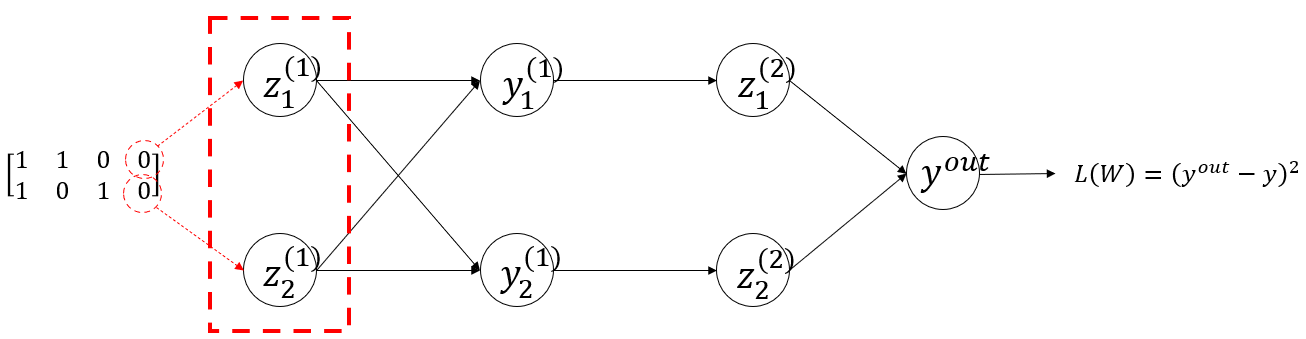

#### 이제 입력 $ z^{(1)} $ 과 $y^{(1)}$ 그리고 $z^{(2)} $  마지막으로, $y^{(out)}$ 에 대해 각각 학습된 그림을 그려본 결과이다.

입력층에 매핑된 XOR 데이터 그림


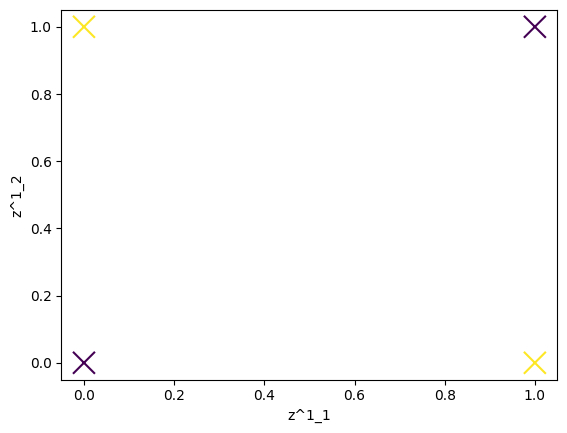

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_data[:,0], X_data[:,1], c=y_data,s=250, marker='x')
print("입력층에 매핑된 XOR 데이터 그림")
plt.xlabel("z^1_1")
plt.ylabel("z^1_2")
plt.show()

### 입력층 $z^{(1)}_1 , z^{(1)}_2 $은 XOR 데이터를 그대로 받아들이기 때문에 XOR 데이터와 같은 것을 볼 수 있다.
### 이제 첫 번째 선형변환층 $ y^{(1)}_1, y^{(1)}_2 $ 을 XOR 4개 데이터에 대해 매핑된 결과를 그려보면 아래와 같다.

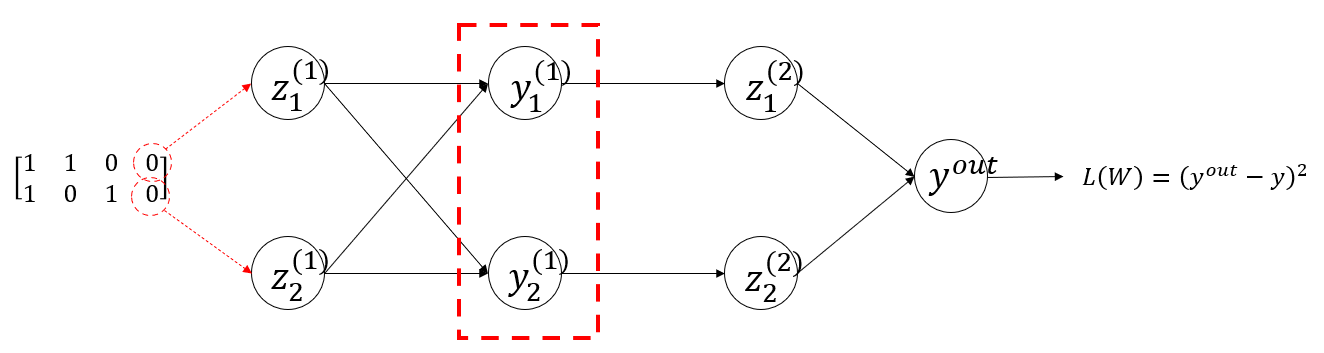

첫 번째 선형변환층에 매핑된 XOR 데이터 그림


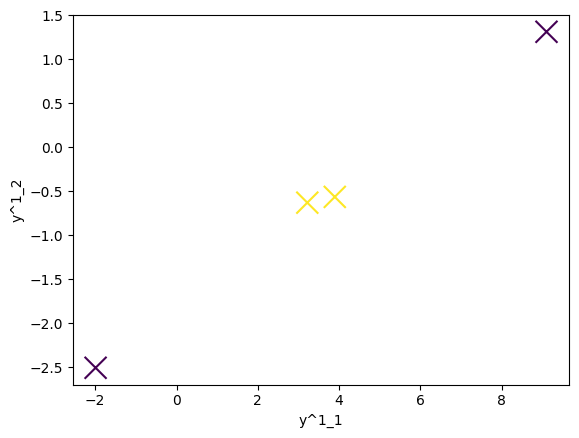

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y[:,0], y[:,1], c=y_data,s=250, marker='x')
print("첫 번째 선형변환층에 매핑된 XOR 데이터 그림")
plt.xlabel("y^1_1")
plt.ylabel("y^1_2")
plt.show()

### 눈으로 어림짐작 보았을 때 아직은 직선 하나로 나눠진다는 것이 확실히 보이지 않는다.
### 하지만 첫 번째 비선형변환층 $z^{(2)}_1, z^{(2)}_2 $에 대해 그려보면 그 결과를 확실히 볼 수 있다.

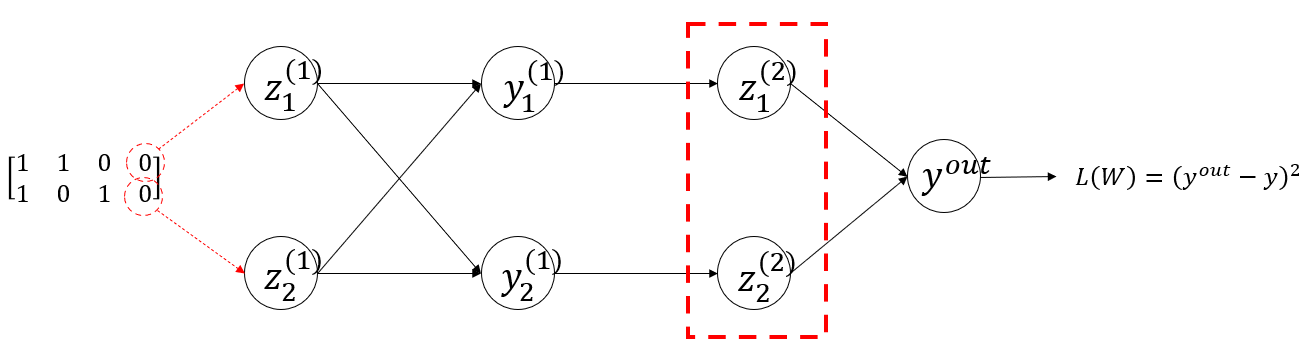

첫 번째 비선형변환층에 매핑된 XOR 데이터 그림


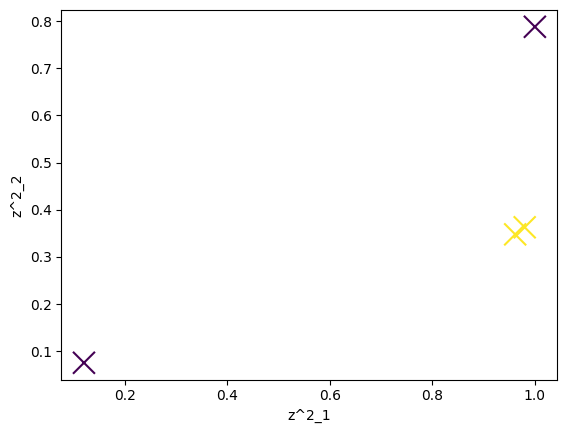

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(z[:,0], z[:,1], c=y_data,s=250, marker='x')
print("첫 번째 비선형변환층에 매핑된 XOR 데이터 그림")
plt.xlabel("z^2_1")
plt.ylabel("z^2_2")
plt.show()

### 결과를 보면 출력층의 입력으로 들어가는 비선형변환층 $z^{(2)}_1 , z^{(2)}_2 $ 에 XOR 데이터를 매핑했을 때 직선하나로 구분할 수 있는 결과를 도출했음을 알 수 있다.
### 즉 XOR 문제를 신경망이 학습한다는 의미는 XOR 데이터를 마지막 출력층이 직선 하나로 나눠지게 하도록 데이터들의 정의역을 바꿔가는 것이다.
# 즉 지도학습에서 신경망은 마지막 출력층으로의 바로 전 단계의 입력층($z^{(2)}_1 , z^{(2)}_2 $)을 선형 분리되게 만든다.
### 이에 마지막 출력층은 XOR 데이터를 직선 하나로 나눌수 있게 출력되는 것을 볼 수 있다.

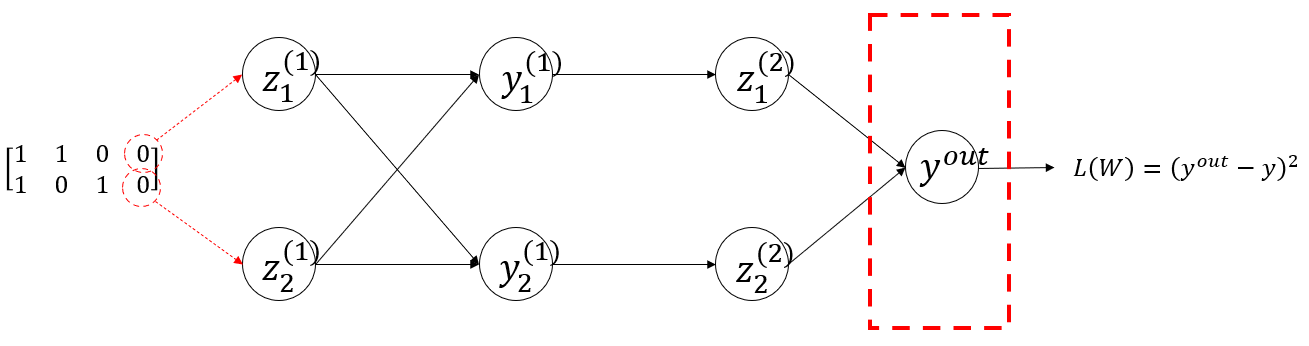

마지막 출력층에 매핑된 XOR 데이터 그림


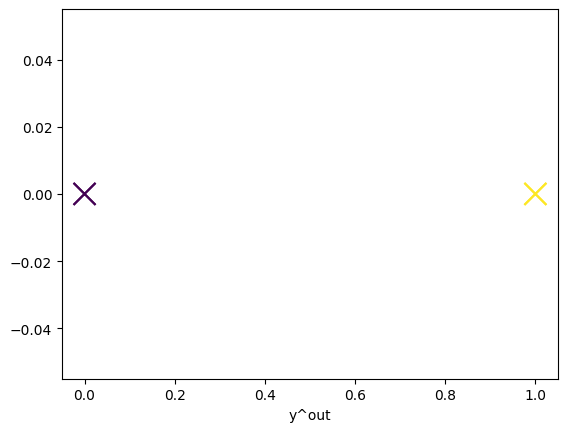

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(out, np.zeros((4,)), c=y_data,s=250, marker='x')
print("마지막 출력층에 매핑된 XOR 데이터 그림")
plt.xlabel("y^out")
plt.show()

# 
# 자 이제 관점을 다르게하여 입력층 $ z^{(1)}_1 , z^{(1)}_2 $ 에 대해 $ y^{out} $ 을 어떻게 예측하였는지 시각화해보자.

In [11]:
class Sigmoid(layers.Layer):
    def __init__(self, **kwargs):
        super(Sigmoid, self).__init__()

    def build(self, input_shape):
        self.activation = tf.nn.sigmoid
        super(Sigmoid, self).build(input_shape)

    def call(self, inputs, **kwargs):
        out = tf.cast(inputs, dtype=tf.float32)
        out = self.activation(out)
        return out

    def get_config(self):
        config = {'units': self.units}
        base_config = super(Sigmoid, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    #@tf_utils.shape_type_conversion
    def compute_output_shape(self, input_shape):
        return input_shape

class network_model(layers.Layer):
    def __init__(self, name="network_model", **kwargs):
        super(network_model, self).__init__()
        self.d1 = layers.Dense(2)
        self.a1 = Sigmoid()
        self.d2 = layers.Dense(1)

    def call(self, inputs, **kwargs):
        x = tf.cast(inputs, dtype=tf.float32)
        y = self.d1(x)
        z = self.a1(y)
        out = self.d2(z)
        
        return y,z,out
    
class XOR_model(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        name="XOR_model",
        **kwargs
    ):
        super(XOR_model, self).__init__(name=name, **kwargs)
        self.model = network_model()

    def call(self, inputs):
        y,z,out = self.model(inputs)
        return y,z,out

## 2차원으로 나타낸 XOR 문제는 아래와 같다.

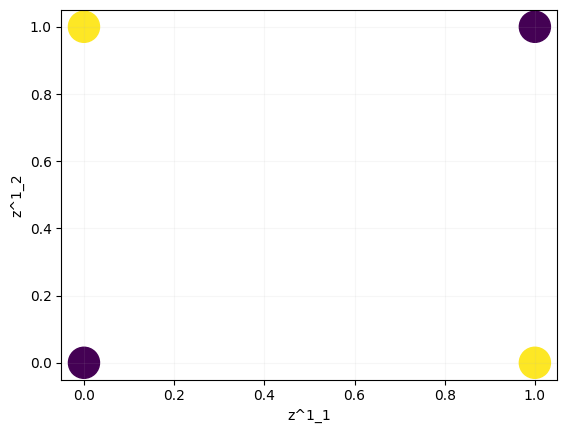

In [12]:
X_data = np.array([[1,1], [1,0], [0,1], [0,0]])
y_data = np.array([[0], [1], [1], [0]])
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(X_data[:,0], X_data[:,1], c=y_data, s=500)
plt.grid(alpha=0.1)
plt.xlabel("z^1_1")
plt.ylabel('z^1_2')
plt.show()

## 학습된 신경망의 입력층 $ z^{(1)}_1 , z^{(1)}_2 $ 에 대한 예측에서  $ y^{out} $ 의 값은 실수값을 출력한다.
## 이때 출력값이 0.5보다 크면 1, 0.5보다 작으면 0 으로 출력하면 다음과 같은 경계선이 생긴다. 

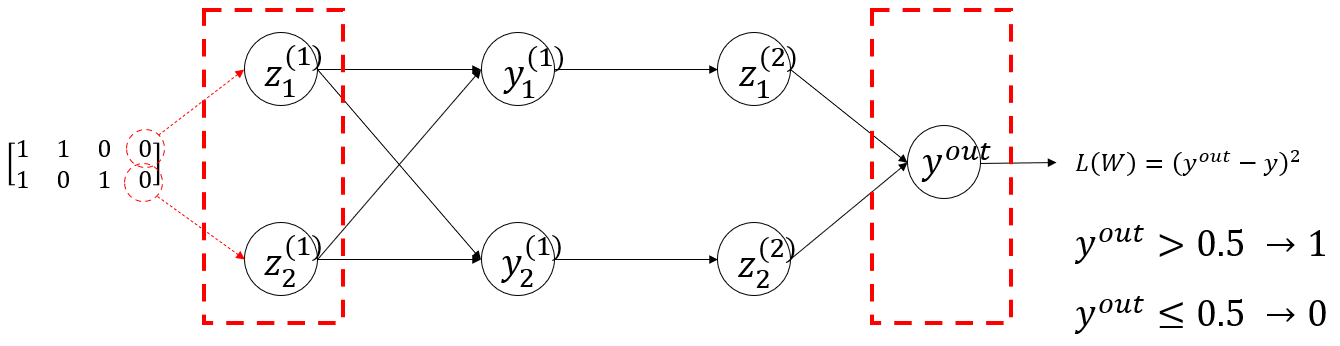

In [13]:
def fu(X,Y):
    result = [list(zip(x, y)) for x, y in zip(X, Y)]
    S = np.array(result)
    S = S.reshape(-1,2)
    return S

In [14]:
optimizer = keras.optimizers.Adam()
mse = tf.keras.losses.MeanSquaredError()
model = XOR_model()
epochs = 10001
pred_list = []

for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        y,z,out = model(X_data)
        loss = mse(y_data, out)
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

    if epoch % 500 == 0:
        A = np.linspace(-0.03,1.03,250)
        B = np.linspace(1.03,-0.03,250)
        A1,B1 = np.meshgrid(A,B)
        S = fu(A1,B1)
        y, z, out = model(S)
        out = np.reshape(out, (250,250))
        pred_list.append(copy.deepcopy(out))
        
    if epoch % 1000 == 0:
        print("{} th loss : {}".format(epoch, np.array(loss)))

0 th loss : 1.450883150100708
1000 th loss : 0.2563800811767578
2000 th loss : 0.24364475905895233
3000 th loss : 0.23080921173095703
4000 th loss : 0.20916438102722168
5000 th loss : 0.15473337471485138
6000 th loss : 0.04415839910507202
7000 th loss : 0.001129102660343051
8000 th loss : 7.203976792879985e-07
9000 th loss : 2.4896685602016078e-08
10000 th loss : 5.675418535133758e-08


In [15]:
y, z, out = model(X_data)
print("신경망의 예측값 : \n",np.array(out))

신경망의 예측값 : 
 [[1.2598932e-04]
 [9.9989927e-01]
 [1.0002689e+00]
 [1.0132790e-06]]


In [16]:
print(np.shape(pred_list))
pred_list = np.array(pred_list)
print(np.shape(pred_list))

(21, 250, 250)
(21, 250, 250)


## 학습된 신경망의 XOR 경계선 출력

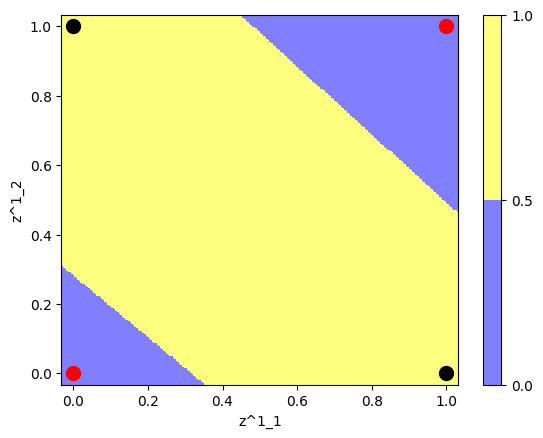

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cmap = matplotlib.colors.ListedColormap(['blue', 'yellow'])
boundaries = [0. ,0.5,1.]
norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
plt.pcolormesh(A1,B1,pred_list[-1, :,:], cmap=cmap, norm=norm, alpha=0.5)
plt.colorbar()
plt.scatter([0,1], [1,0],s=100,c='k')
plt.scatter([0,1], [0,1],s=100,c='r')
plt.xlabel("z^1_1")
plt.ylabel("z^1_2")
plt.show()

## 신경망이 학습되는 과정을 2차원으로 시각화한 애니메이션

<IPython.core.display.Javascript object>


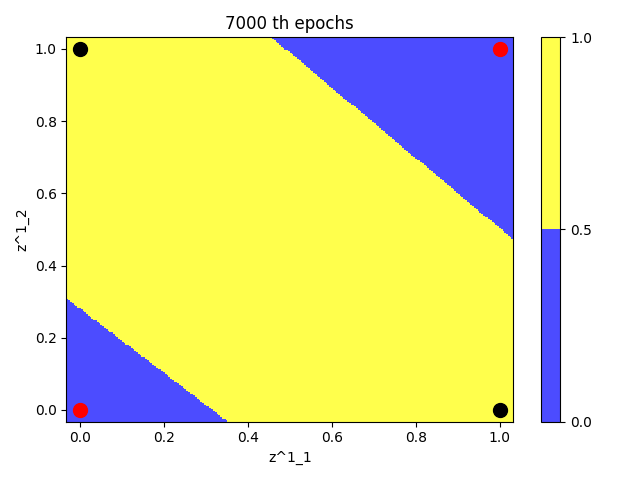

In [18]:
%matplotlib notebook
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111)

cmap = matplotlib.colors.ListedColormap(['blue', 'yellow'])
boundaries = [0. ,0.5,1.]
norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
cax = ax.pcolormesh(A1, B1, pred_list[0, :, :], cmap=cmap, norm=norm, alpha=0.7)
fig.colorbar(cax)
plt.scatter([0,1], [1,0],s=100,c='k')
plt.scatter([0,1], [0,1],s=100,c='r')
plt.xlabel("z^1_1")
plt.ylabel("z^1_2")

def animate(i):
    plt.title("{} th epochs".format(i*500))
    cax.set_array(pred_list[i, :, :].flatten())
t = np.arange(21)
anim = animation.FuncAnimation(fig, animate, interval=100, frames=len(t) - 1)
plt.show()

# 
# 
# 
# 
# 파트 1 - 2. 인공지능 신경망이 XOR문제를 어떻게 해결하는지 3차원으로 시각화해보자.

# 
### 최종적으로 시각화하여 애니메이션으로 그린 그림은 밑 URL 을 들여다보자.
http://gjtrj55.iwinv.net/wp/2022/12/23/xor-%ec%8b%9c%ea%b0%81%ed%99%94/
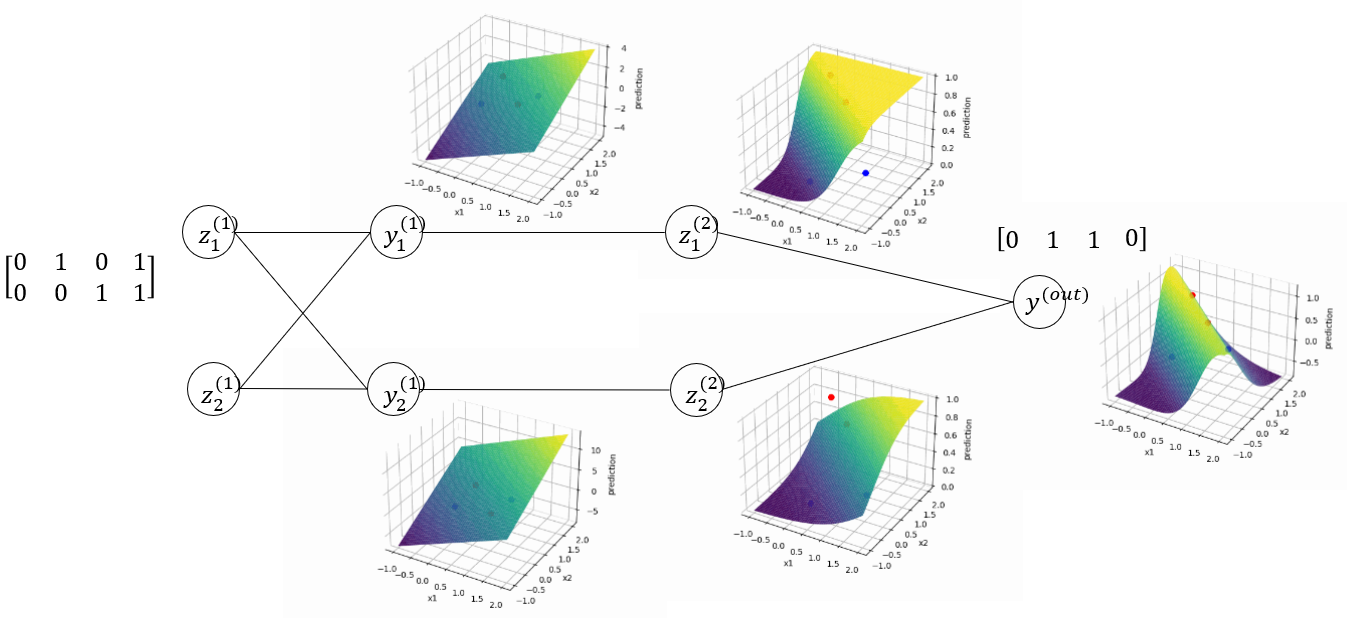

### XOR 문제를 2차원 입력 특징에 대해 정답 y 를 그리면 3차원으로 아래와 같이 시각화할 수 있다.

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


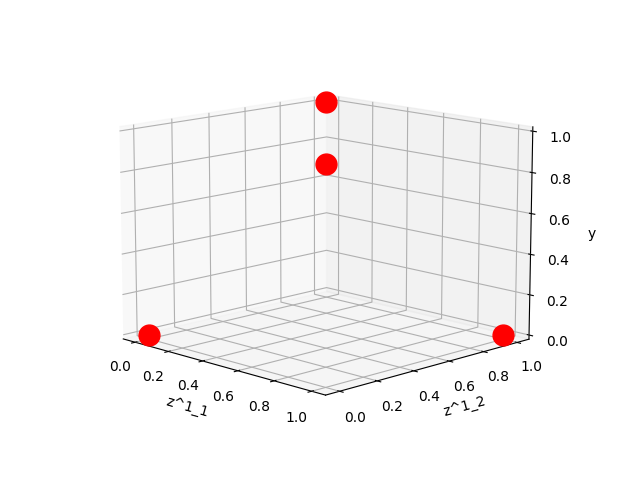

In [38]:
%matplotlib inline  
%matplotlib notebook
%pylab
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro', markersize=15)
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('y')
plt.show()

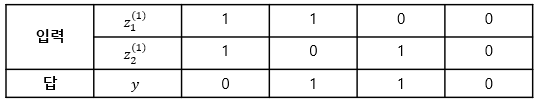

In [20]:
def fu(X,Y):
    result = [list(zip(x, y)) for x, y in zip(X, Y)]
    S = np.array(result)
    S = S.reshape(-1,2)
    return S

class Sigmoid(layers.Layer):
    def __init__(self, **kwargs):
        super(Sigmoid, self).__init__()

    def build(self, input_shape):
        self.activation = tf.nn.sigmoid
        super(Sigmoid, self).build(input_shape)

    def call(self, inputs, **kwargs):
        out = tf.cast(inputs, dtype=tf.float32)
        out = self.activation(out)
        return out

    def get_config(self):
        config = {'units': self.units}
        base_config = super(Sigmoid, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    #@tf_utils.shape_type_conversion
    def compute_output_shape(self, input_shape):
        return input_shape

class network_model(layers.Layer):
    def __init__(self, name="network_model", **kwargs):
        super(network_model, self).__init__()
        self.d1 = layers.Dense(2)
        self.a1 = Sigmoid()
        self.d2 = layers.Dense(1)

    def call(self, inputs, **kwargs):
        x = tf.cast(inputs, dtype=tf.float32)
        y = self.d1(x)
        z = self.a1(y)
        out = self.d2(z)
        
        return y,z,out
    
class XOR_model(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        name="XOR_model",
        **kwargs
    ):
        super(XOR_model, self).__init__(name=name, **kwargs)
        self.model = network_model()

    def call(self, inputs):
        y,z,out = self.model(inputs)
        return y,z,out

In [21]:
import copy
optimizer = keras.optimizers.Adam()
mse = tf.keras.losses.MeanSquaredError()
model = XOR_model()
epochs = 10001
pred_list = []
y_list = []
z_list = []

for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        y,z,out = model(X_data)
        loss = mse(y_data, out)
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))

    if epoch % 500 == 0:
        A = np.linspace(-0.03,1.03,250)
        B = np.linspace(1.03,-0.03,250)
        A1,B1 = np.meshgrid(A,B)
        S = fu(A1,B1)
        y, z, out = model(S)
        out = np.reshape(out, (250,250))
        y = np.reshape(y, (250,250,2))
        z = np.reshape(z, (250,250,2))
        
        pred_list.append(copy.deepcopy(out))
        y_list.append(copy.deepcopy(y))
        z_list.append(copy.deepcopy(z))
        
    if epoch % 1000 == 0:
        print("{} th loss : {}".format(epoch, np.array(loss)))

0 th loss : 1.0144414901733398
1000 th loss : 0.23798218369483948
2000 th loss : 0.208967924118042
3000 th loss : 0.15953463315963745
4000 th loss : 0.055406875908374786
5000 th loss : 0.0031390832737088203
6000 th loss : 1.1435615306254476e-05
7000 th loss : 2.881191818460138e-08
8000 th loss : 5.525464530364843e-08
9000 th loss : 5.759529386750728e-08
10000 th loss : 2.9654989575078616e-08


In [40]:
pred_list = np.array(pred_list)
y_list = np.array(y_list)
z_list = np.array(z_list)
print(np.shape(pred_list))
print(np.shape(z_list))

(21, 250, 250)
(21, 250, 250, 2)


# 
# 
## 신경망의 XOR 데이터에 대한 예측값 $y^{out}$은 실수값을 가지며 입력값 $z^{(1)}_1 , z^{(1)}_2$ 이 [0,1] 사이에 존재하는 연속값들을 신경망에 넣어 예측값을 그린 그림들은 아래와 같다. 

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


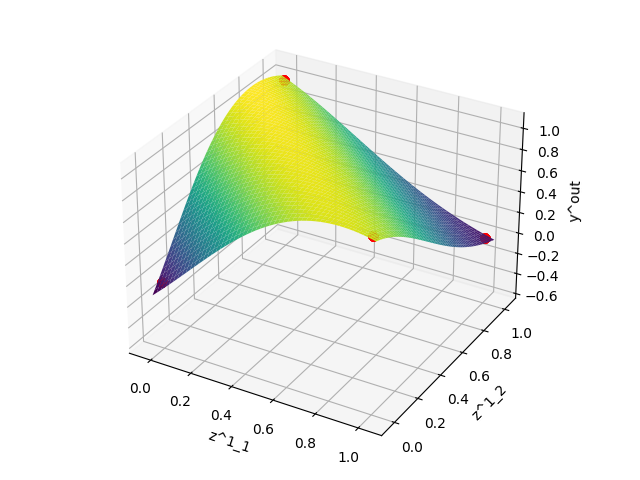

In [42]:
%matplotlib inline  
%matplotlib notebook
%pylab

N = 250
fps = 10 # frame per sec
frn = 21 # frame number of the animation

xs = np.linspace(-0.03,1.03,N)
ys = np.linspace(1.03,-0.03,N)
X, Y = np.meshgrid(xs, ys)
S = fu(X,Y)

Z = np.zeros((N, N, frn))


for i in range(frn):
    Z[:,:,i] = pred_list[i, :, :]


def update_plot(frame_number, Z, plot):
    plot[0].remove()
    ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro')
    plot[0] = ax.plot_surface(X, Y, Z[:,:,frame_number], cmap='viridis')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('y^out')

plot = [ax.plot_surface(X, Y, Z[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)
plt.show()

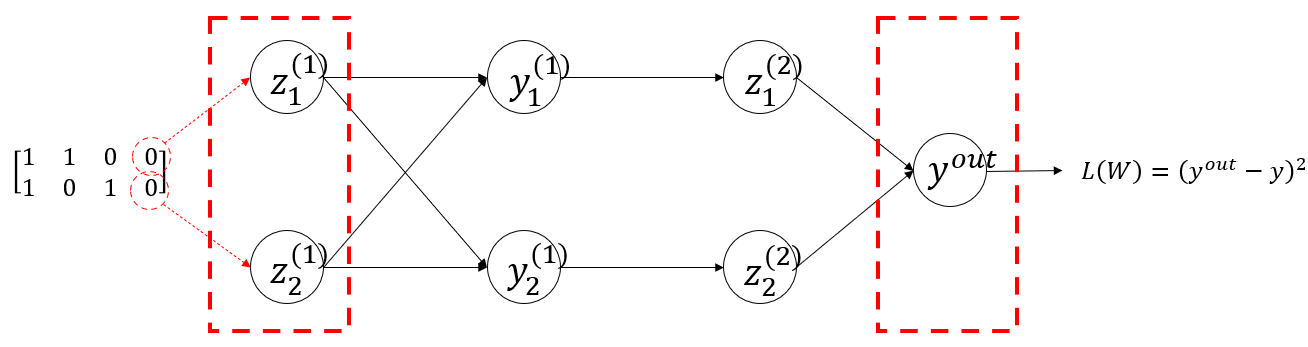

## 입력층 $z^{(1)}_1 , z^{(1)}_2$ 에 대한 출력층 예측값 $y^{out}$ 시각화
# 

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<IPython.core.display.Javascript object>


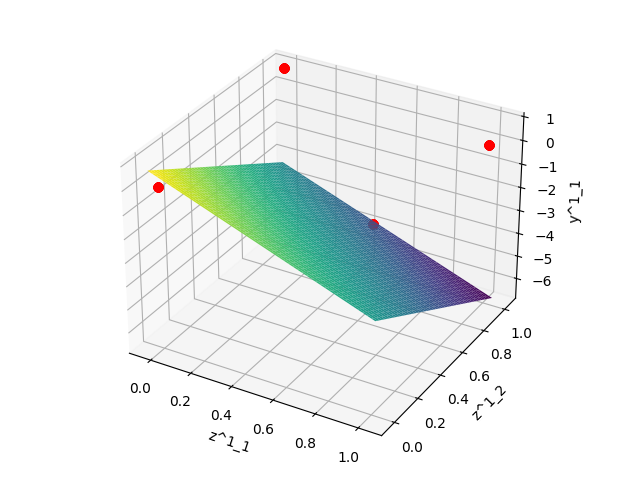

In [30]:
%matplotlib inline  
%matplotlib notebook
%pylab

N = 250
fps = 10 # frame per sec
frn = 21 # frame number of the animation

xs = np.linspace(-0.03,1.03,N)
ys = np.linspace(1.03,-0.03,N)
X, Y = np.meshgrid(xs, ys)
S = fu(X,Y)

Z = np.zeros((N, N, frn))


for i in range(frn):
    Z[:,:,i] = y_list[i, :, :, 0]


def update_plot(frame_number, Z, plot):
    plot[0].remove()
    ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro')
    plot[0] = ax.plot_surface(X, Y, Z[:,:,frame_number], cmap='viridis')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('y^1_1')

plot = [ax.plot_surface(X, Y, Z[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)
plt.show()

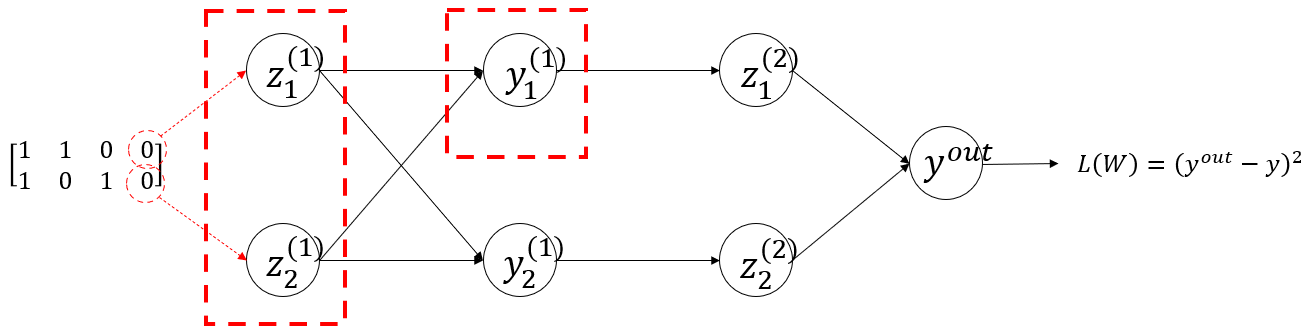

## 입력층 $z^{(1)}_1 , z^{(1)}_2$ 에 대한 은닉층의 첫 번째 선형변환 노드 $y^{(1)}_1$ 시각화
# 

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


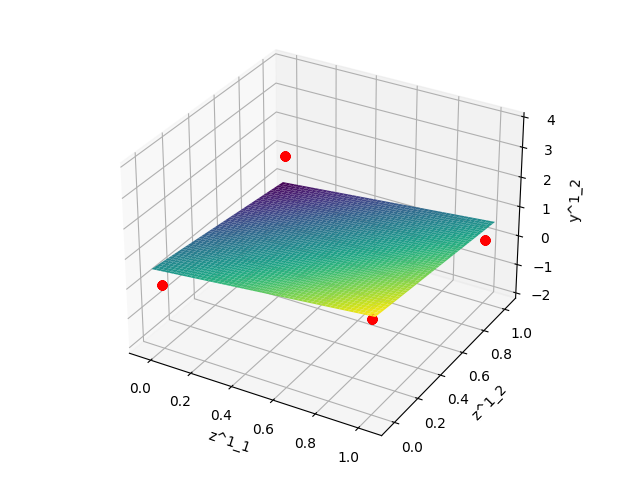

In [31]:
%matplotlib inline  
%matplotlib notebook
%pylab

N = 250
fps = 10 # frame per sec
frn = 21 # frame number of the animation

xs = np.linspace(-0.03,1.03,N)
ys = np.linspace(1.03,-0.03,N)
X, Y = np.meshgrid(xs, ys)
S = fu(X,Y)

Z = np.zeros((N, N, frn))


for i in range(frn):
    Z[:,:,i] = y_list[i, :, :, 1]


def update_plot(frame_number, Z, plot):
    plot[0].remove()
    ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro')
    plot[0] = ax.plot_surface(X, Y, Z[:,:,frame_number], cmap='viridis')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('y^1_2')

plot = [ax.plot_surface(X, Y, Z[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)
plt.show()

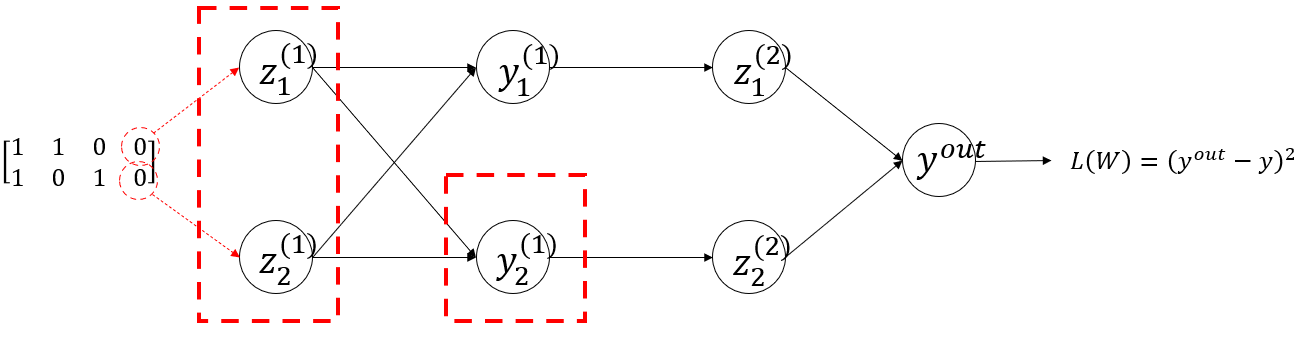

## 입력층 $z^{(1)}_1 , z^{(1)}_2$ 에 대한 은닉층의 두 번째 선형변환 노드 $y^{(1)}_2$ 시각화
# 

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


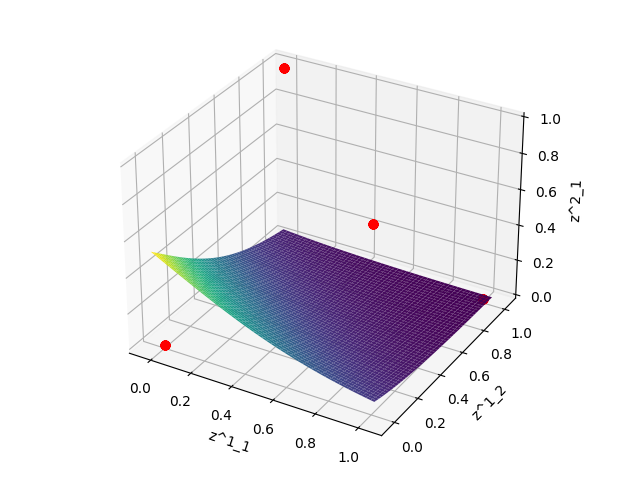

In [43]:
%matplotlib inline  
%matplotlib notebook
%pylab

N = 250
fps = 10 # frame per sec
frn = 21 # frame number of the animation

xs = np.linspace(-0.03,1.03,N)
ys = np.linspace(1.03,-0.03,N)
X, Y = np.meshgrid(xs, ys)
S = fu(X,Y)

Z = np.zeros((N, N, frn))


for i in range(frn):
    Z[:,:,i] = z_list[i, :, :, 0]


def update_plot(frame_number, Z, plot):
    plot[0].remove()
    ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro')
    plot[0] = ax.plot_surface(X, Y, Z[:,:,frame_number], cmap='viridis')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('z^2_1')

plot = [ax.plot_surface(X, Y, Z[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)
plt.show()

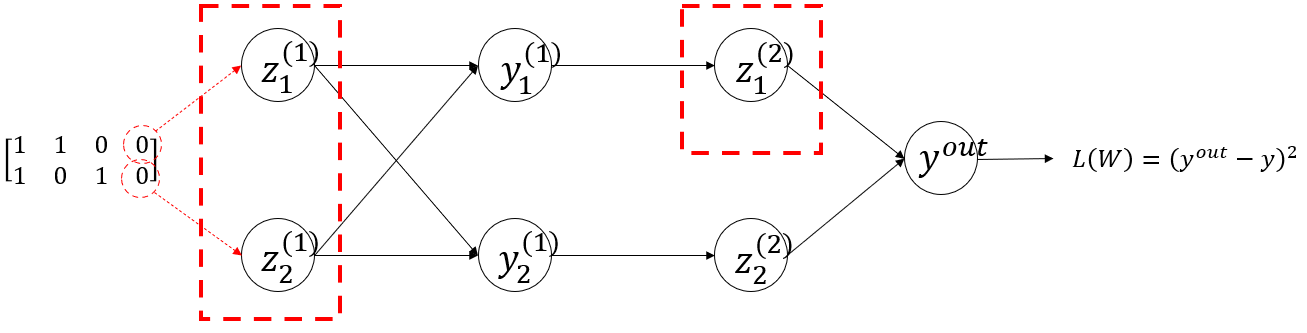

## 입력층 $z^{(1)}_1 , z^{(1)}_2$ 에 대한 은닉층의 첫 번째 비선형변환 노드 $z^{(2)}_1$ 시각화
# 

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


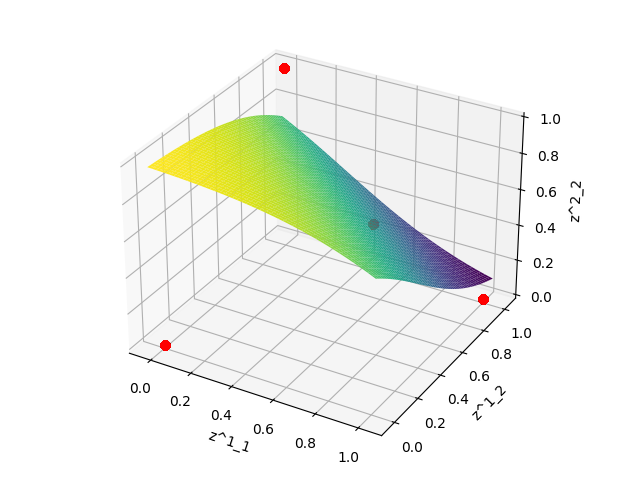

In [44]:
%matplotlib inline  
%matplotlib notebook
%pylab

N = 250
fps = 10 # frame per sec
frn = 21 # frame number of the animation

xs = np.linspace(-0.03,1.03,N)
ys = np.linspace(1.03,-0.03,N)
X, Y = np.meshgrid(xs, ys)
S = fu(X,Y)

Z = np.zeros((N, N, frn))


for i in range(frn):
    Z[:,:,i] = z_list[i, :, :, 1]


def update_plot(frame_number, Z, plot):
    plot[0].remove()
    ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro')
    plot[0] = ax.plot_surface(X, Y, Z[:,:,frame_number], cmap='viridis')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('z^2_2')

plot = [ax.plot_surface(X, Y, Z[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)
plt.show()

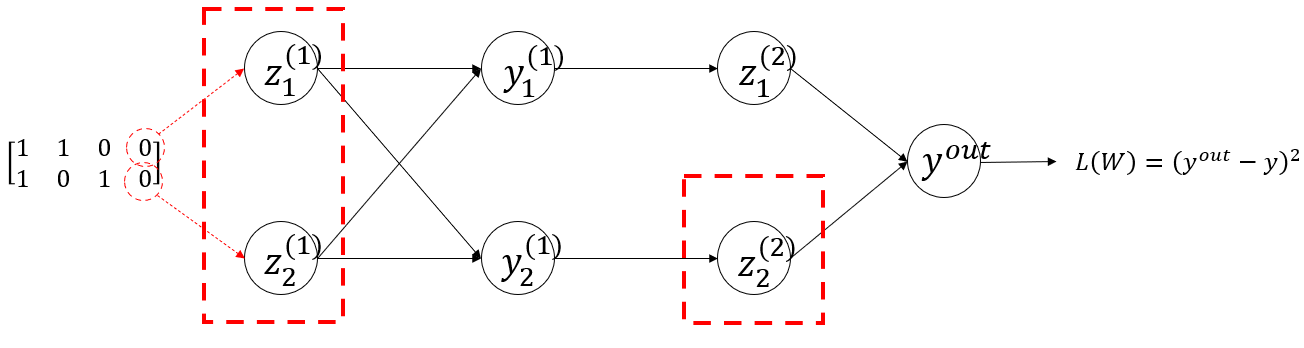

## 입력층 $z^{(1)}_1 , z^{(1)}_2$ 에 대한 은닉층의 두 번째 비선형변환 노드 $z^{(2)}_2$ 시각화
# 

# 
# 
# 
# 파트 2 - 1. 다양한 인공지능 신경망을 설계하여 XOR문제를 어떻게 해결하는지 시각화해보자.

In [21]:
def fu(X,Y):
    result = [list(zip(x, y)) for x, y in zip(X, Y)]
    S = np.array(result)
    S = S.reshape(-1,2)
    return S

class network_model(layers.Layer):
    def __init__(self, name="network_model", node_num=2, hidden_layer_num=1, activation_name='sigmoid'  ,**kwargs):
        super(network_model, self).__init__()
        self.hidden_layer_num = hidden_layer_num
        self.node_num = node_num
        self.activation_name= activation_name
        
        for idx in range(1, self.hidden_layer_num+1):
            globals()['self.d{}'.format(idx)] = layers.Dense(self.node_num)
            globals()['self.a{}'.format(idx)] = layers.Activation(self.activation_name)
        self.out = layers.Dense(1)

    def call(self, inputs, **kwargs):
        x = tf.cast(inputs, dtype=tf.float32)
        for idx in range(1,self.hidden_layer_num+1):
            x = globals()['self.d{}'.format(idx)](x)
            x = globals()['self.a{}'.format(idx)](x)
        x = self.out(x)
        
        return x
    
class XOR_model(keras.Model):
    """Combines the encoder and decoder into an end-to-end model for training."""

    def __init__(
        self,
        name="XOR_model",
        node_num=2,
        hidden_layer_num=1,
        activation_name='sigmoid',
        **kwargs
    ):
        super(XOR_model, self).__init__(name=name, **kwargs)
        
        self.hidden_layer_num = hidden_layer_num
        self.node_num = node_num
        self.activation_name= activation_name
        
        self.model = network_model(node_num=self.node_num, hidden_layer_num=self.hidden_layer_num,
                                   activation_name=self.activation_name)

    def call(self, inputs):
        out = self.model(inputs)
        return out

# 
## 신경망 모델의 은닉층 수와 노드 수를 다양하게 주어 XOR 해결 과정을 시각화해보자

In [22]:
import copy

h_num = int(input("은닉층 수를 입력하세요 : "))
n_num = int(input("노드 수를 입력하세요 : "))
acti = input("활성함수를 입력하세요(relu, sigmoid, tanh , etc...) :")

optimizer = keras.optimizers.Adam()
mse = tf.keras.losses.MeanSquaredError()
model = XOR_model(node_num=n_num, hidden_layer_num=h_num,
                                   activation_name=acti)
epochs = 10001
pred_list = []

for epoch in range(epochs):
    
    with tf.GradientTape() as tape:
        out = model(X_data)
        loss = mse(y_data, out)
    grad = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grad, model.trainable_variables))
    

    if epoch % 500 == 0:
        A = np.linspace(-0.03,1.03,250)
        B = np.linspace(1.03,-0.03,250)
        A1,B1 = np.meshgrid(A,B)
        S = fu(A1,B1)
        out = model(S)
        out = np.reshape(out, (250,250))
        
        pred_list.append(copy.deepcopy(out))
        
    if epoch % 1000 == 0:
        print("{} th loss : {}".format(epoch, np.array(loss)))

은닉층 수를 입력하세요 : 3
노드 수를 입력하세요 : 6
활성함수를 입력하세요(relu, sigmoid, tanh , etc...) :tanh
0 th loss : 0.4054368734359741
1000 th loss : 0.20911380648612976
2000 th loss : 0.17935019731521606
3000 th loss : 0.1527210772037506
4000 th loss : 0.1269485354423523
5000 th loss : 0.10086394101381302
6000 th loss : 0.07596462219953537
7000 th loss : 0.05386381223797798
8000 th loss : 0.03553338348865509
9000 th loss : 0.021357454359531403
10000 th loss : 0.011275636963546276


Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


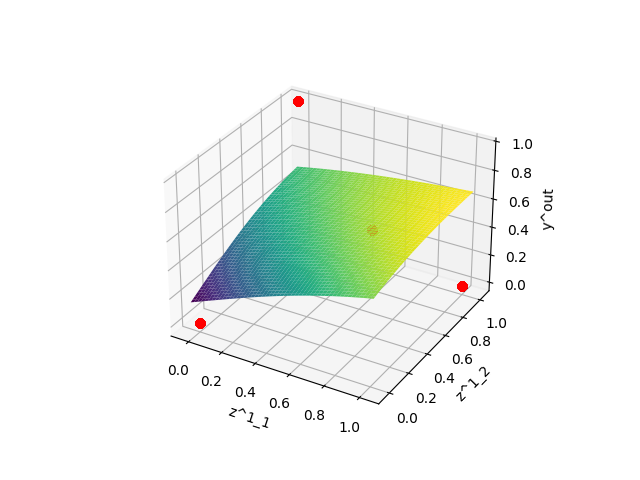

In [24]:
%matplotlib inline  
%matplotlib notebook
%pylab
pred_list = np.array(pred_list)
N = 250
fps = 10 # frame per sec
frn = 21 # frame number of the animation

xs = np.linspace(-0.03,1.03,N)
ys = np.linspace(1.03,-0.03,N)
X, Y = np.meshgrid(xs, ys)
S = fu(X,Y)

Z = np.zeros((N, N, frn))


for i in range(frn):
    Z[:,:,i] = pred_list[i, :, :]


def update_plot(frame_number, Z, plot):
    plot[0].remove()
    ax.plot(X_data[:,0], X_data[:,1], np.reshape(y_data, (-1)), 'ro')
    plot[0] = ax.plot_surface(X, Y, Z[:,:,frame_number], cmap='viridis')


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('z^1_1')
ax.set_ylabel('z^1_2')
ax.set_zlabel('y^out')

plot = [ax.plot_surface(X, Y, Z[:,:,0], color='0.75', rstride=1, cstride=1)]

ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(Z, plot), interval=1000/fps)
plt.show()

## 은닉층 수, 노드 수, 다른 활성함수를 사용하면 다 다른 결과들이 도출되는 것을 볼 수 있다. 왜그럴까?